## 5.1

In this section, we plot the normalized flux and try to observe the transit. To convert the x-axis to useful units of time, we first take our mid-transit JD, then subtract that value from the JD array, and finally multiply those values by 24 (24 hours in 1 JD).

(array([129]),)
2460220.660904109


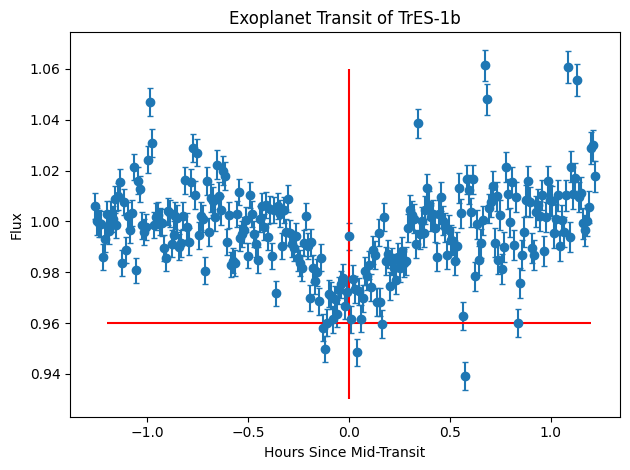

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Load data skipping the header row
data = np.loadtxt('section_4_5.csv', skiprows=1, delimiter=',')

i = 255

date_obs = data[:,0]
flux = data[:,1]
flux_err = data[:,2]
normalized_flux = data[:,3]
r = data[:,4]
r_err = data[:,5]
kep_norm = data[:,6]
kep_err = data[:,7]

transit_time_jd = 2460220.660904109

# Convert JD to hours since transit
hours_since_transit = (date_obs - transit_time_jd) * 24  # 1 JD = 24 hours


print(np.where(hours_since_transit == 0))
print(date_obs[129])

plt.errorbar(hours_since_transit[:i], kep_norm[:i], yerr=kep_err[:i], fmt='o', capsize=2)
plt.vlines(x = hours[130], ymin = .93, ymax = 1.06,color='red')
plt.hlines(y = 0.96, xmin = -1.2, xmax = 1.2,color='red')
plt.title('Exoplanet Transit of TrES-1b')
plt.xlabel('Hours Since Mid-Transit')
plt.ylabel('Flux')


plt.tight_layout()
plt.show()


For easier viewing, we color code what we observe as the transit start and transit end:

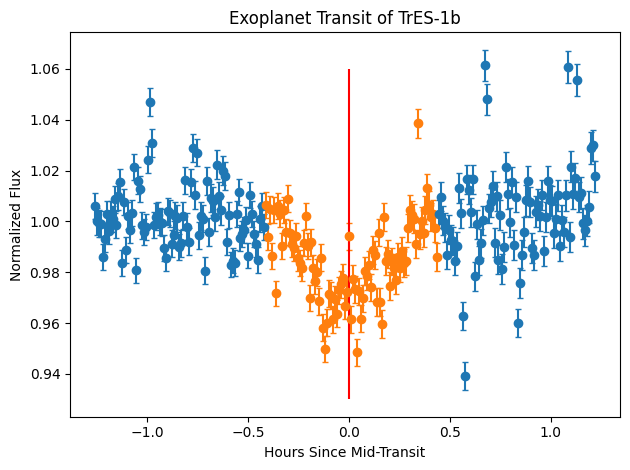

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Load data skipping the header row
data = np.loadtxt('section_4_5.csv', skiprows=1, delimiter=',')

a = 87
b = 175



plt.errorbar(hours_since_transit[:a], kep_norm[:a], yerr=kep_err[:a], fmt='o', capsize=2)
plt.errorbar(hours_since_transit[a:b], kep_norm[a:b], yerr=kep_err[a:b], fmt='o', capsize=2)
plt.errorbar(hours_since_transit[b:i], kep_norm[b:i], yerr=kep_err[b:i], fmt='o', capsize=2,color='tab:blue')

plt.vlines(x = hours[130], ymin = .93, ymax = 1.06,color='red')
plt.title('Exoplanet Transit of TrES-1b')
plt.xlabel('Hours Since Mid-Transit')
plt.ylabel('Normalized Flux')


plt.tight_layout()
plt.show()


## 5.2

To determine the transit depth, we take the average of a few data points around the mid-transit time. To determine the transit duration, we subtract the end-of-transit time from the start-of-transit time.

In [122]:
import numpy as np

# Define the indices around t=0
indices = range(127, 131)

# Extract flux and flux error for the selected indices
flux_selected = kep_norm[indices]
flux_err_selected = kep_err[indices]

# Calculate average flux and its uncertainty
depth_av = np.average(flux_selected)
depth_av_err = np.sqrt(np.sum(flux_err_selected**2)) / len(flux_selected)  

# Calculate transit depth and its uncertainty
depth = 1 - depth_av
depth_err = depth_av_err  # Assuming uncertainty in the average is the uncertainty in the depth

print(f'Transit Depth: {depth:.4f} mag +/- {depth_err:.4f} mag')

#Estimate transit duration
print(f'Transit Duration: {hours_since_transit[b] - hours_since_transit[a]:.2f} hours')


Transit Depth: 0.0263 mag +/- 0.0027 mag
Transit Duration: 0.86 hours
